# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Reading Data

In [2]:
try_encodings = ['utf-8', 'latin-1', 'utf-16', 'ISO-8859-1']
for encoding in try_encodings:
    try:
        df = pd.read_csv('dataset/spam.csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

Failed to read with encoding: utf-8
Successfully read the file with encoding: latin-1


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# checking missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking for duplicates values in the dataset
df.duplicated().sum()

403

403 duplicated values found in the dataset. We need to remove them

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# renmaing columns - giving columns meaningful names
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
le = LabelEncoder()
le.fit(df['label'])
le.classes_

array(['ham', 'spam'], dtype=object)

In [12]:
df['y'] = le.transform(df.label)

In [13]:
df.head()

,label,message,y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Exploratory Data Analysis (EDA)

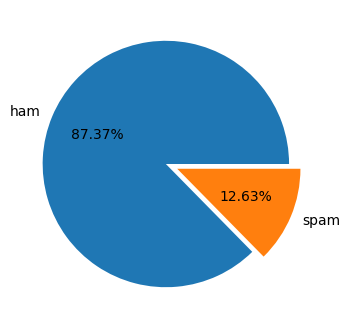

In [14]:
plt.figure(figsize=(4,4))
values = df['label'].value_counts()
plt.pie(values, labels=df.label.unique(), autopct='%1.2f%%',startangle=0,explode=(0,0.1))
plt.show()

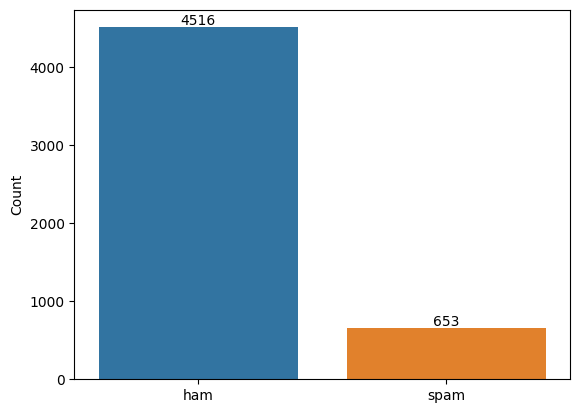

In [15]:
ax = sns.barplot(x=df.label.unique(),y=df['label'].value_counts(),)
plt.ylabel('Count')

for i, v in enumerate(df['label'].value_counts()):
    ax.text(i, v+1, str(v), color='black', ha='center', va='bottom')

plt.show()

## Pre-Processing

In [16]:
wordnet = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
    # removing special characters & numbers and just keeping alphabets
    var = re.sub("[^a-zA-Z0-9]", " ", text)

    # lowercasing
    var = var.lower()

    var = var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # removing stopwords
    var = ' '.join(var)

    return var

In [18]:
print(df['message'][0])
print('>>> After Processing')
preprocess_text(df['message'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
>>> After Processing


'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [19]:
df['processed_message'] = df['message'].apply(preprocess_text)
df.head()

,label,message,y,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though


In [20]:
from wordcloud import WordCloud
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white')

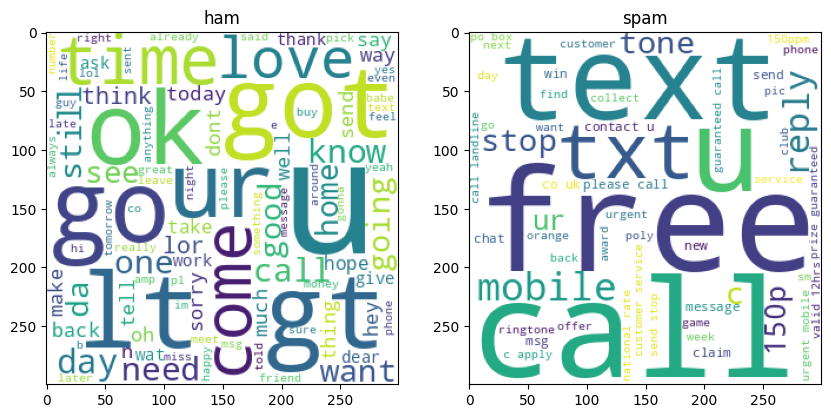

In [21]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,12))

for i in range(len(df['label'].unique())):
    ax = axs[i%2]
    cloud = wc.generate(df[df['y'] == i]['processed_message'].str.cat(sep=" "))
    ax.imshow(cloud)
    ax.set_title(le.inverse_transform([i])[0])

plt.show()

In [22]:
# Now building a corpus which will be a 2d list with 2 rows one row for each category (ham & spam)
corpus = []
for i in range(len(df['label'].unique())):
    corpus_i = []
    for desc in df[df['y'] == i]['processed_message'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)

print(len(corpus))

2


In [23]:
from collections import Counter

ham_df = pd.DataFrame(Counter(corpus[0]).most_common(40))
ham_df.rename(columns={0:'word',1:'count'},inplace=True)
ham_df.head()

,word,count
0,u,969
1,get,308
2,2,302
3,gt,288
4,lt,287


In [24]:
spam_df = pd.DataFrame(Counter(corpus[1]).most_common(40))
spam_df.rename(columns={0:'word',1:'count'},inplace=True)
spam_df.head()

,word,count
0,call,325
1,free,195
2,2,184
3,u,155
4,txt,134


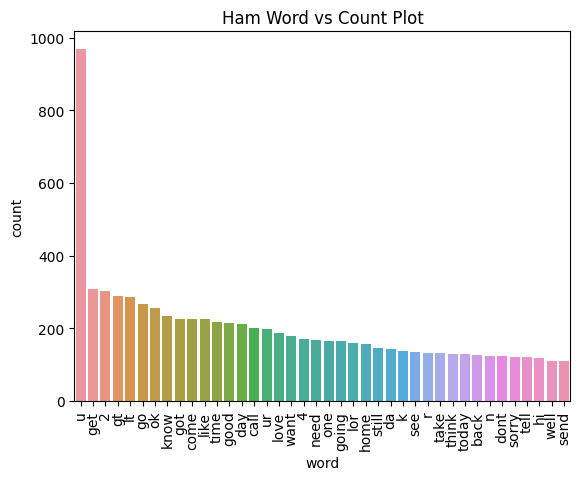

In [25]:
sns.barplot(x=ham_df['word'],y=ham_df['count'])
plt.xticks(rotation='vertical')
plt.title("Ham Word vs Count Plot")
plt.show()

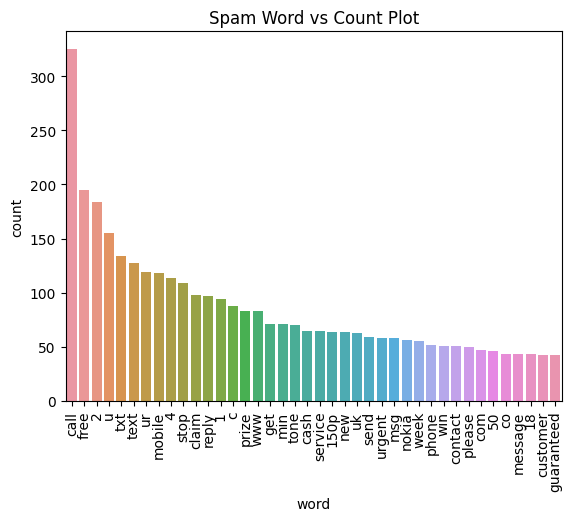

In [26]:
sns.barplot(x=spam_df['word'],y=spam_df['count'])
plt.xticks(rotation='vertical')
plt.title("Spam Word vs Count Plot")
plt.show()

## Feature Engineering

In order to see whether the length of the message has something to do in predicting the label or not. Let's add features like ```num_characters```, ```num_words``` and ```num_sentences``` to the dataframe. And then check the correlation of these features with the output label.

In [27]:
# Adding num_characters feature
df['num_characters'] = df['message'].apply(len)
df.head()

,label,message,y,processed_message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,111
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...,155
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though,61


In [28]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,label,message,y,processed_message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,111,24
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though,61,15


In [29]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,message,y,processed_message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though,61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham
df[df['y']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam
df[df['y']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


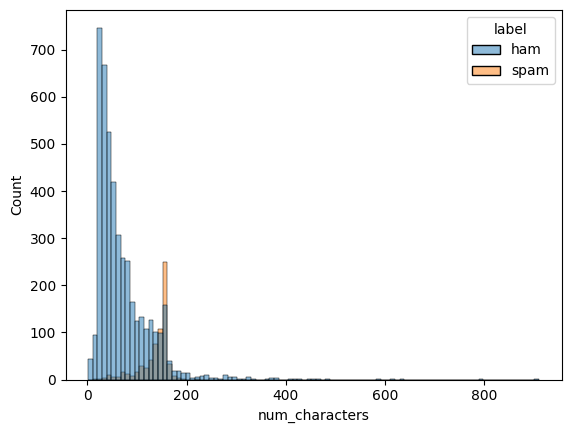

In [33]:
sns.histplot(data=df,x='num_characters',hue='label')
plt.show()

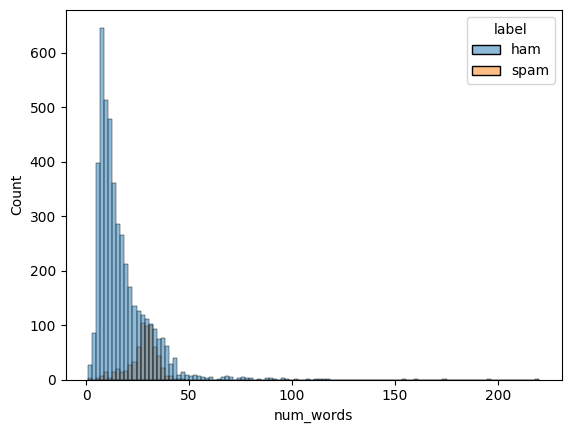

In [34]:
sns.histplot(data=df,x='num_words',hue='label')
plt.show()

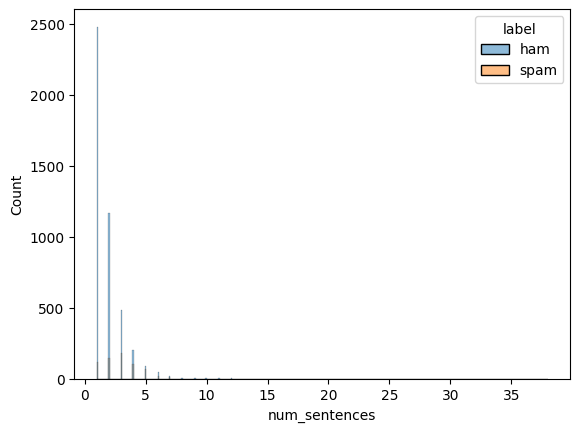

In [35]:
sns.histplot(data=df,x='num_sentences',hue='label')
plt.show()

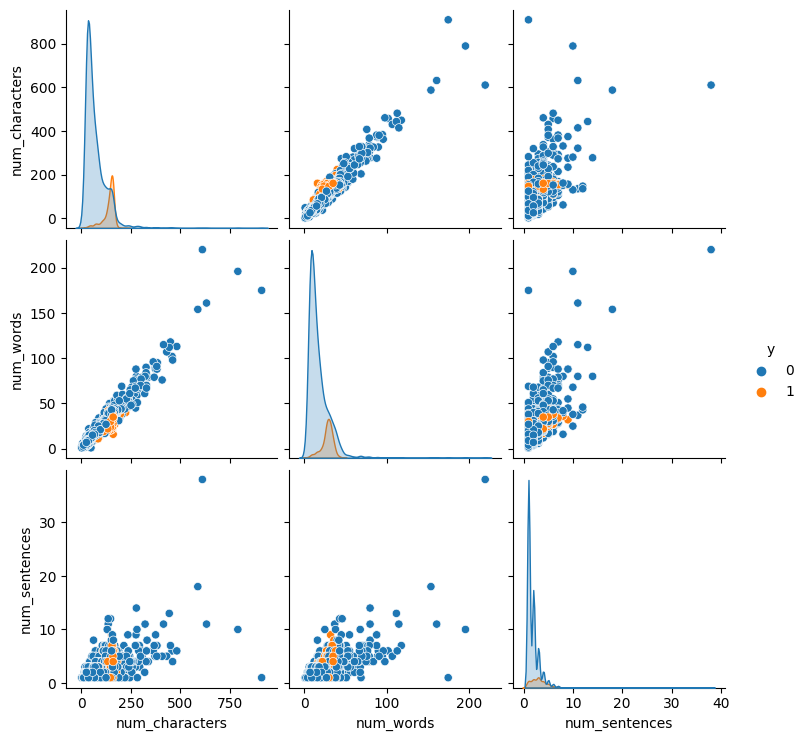

In [36]:
sns.pairplot(data=df,hue='y')
plt.show()

<ipython-input-37-0c88cec39bdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


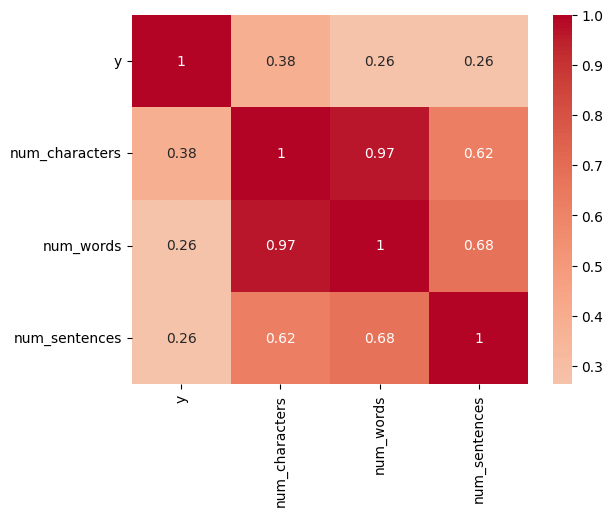

In [37]:
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',center=0)
plt.xticks(rotation='vertical')
plt.show()

From the above histogram plot of correlation matrix it is clear that ```num_characters``` is more related to output label ```y``` than ```num_words``` and ```num_sentences```.

# Building the Model

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X = tfidf.fit_transform(df['processed_message']).toarray()
X.shape

(5169, 3000)

In [40]:
y = df['y'].values
y.shape

(5169,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [43]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
svc = SVC(kernel='sigmoid', gamma=1.0)

In [44]:
clfs = {
    'gnb':gnb,
    'mnb':mnb,
    'bnb':bnb,
    'lg':lg,
    'svc':svc
}

In [50]:
def train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test):
    acc = []
    prec = []
    conf_mat = []
    classification_rep = []

    for clf in clfs:
        model = clfs[clf]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
        prec.append(precision_score(y_test,y_pred))
        conf_mat.append(confusion_matrix(y_test,y_pred))
        classification_rep.append(classification_report(y_test,y_pred))

    return acc,prec,conf_mat,classification_rep

In [60]:
accuracy, precision, conf_mat, class_rep = train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test)
accuracy

[0.8839458413926499,
 0.9758220502901354,
 0.9796905222437138,
 0.960348162475822,
 0.9806576402321083]

In [103]:
precision

[0.5201793721973094, 0.9905660377358491, 0.990909090909091, 1.0, 1.0]

In [84]:
performance = {
    'classifiers':list(clfs.keys()),
    'accuracy':accuracy,
    'precision':precision,
    'confusion_matrix':conf_mat,
    'classification_report':class_rep
}

In [88]:
perf_df = pd.DataFrame(performance).sort_values(by='precision',ascending=False)
perf_df

,classifiers,accuracy,precision,confusion_matrix,classification_report
3,lg,0.960348,1.000000,"[[905, 0], [41, 88]]",precision recall f1-score ...
4,svc,0.980658,1.000000,"[[905, 0], [20, 109]]",precision recall f1-score ...
2,bnb,0.979691,0.990909,"[[904, 1], [20, 109]]",precision recall f1-score ...
1,mnb,0.975822,0.990566,"[[904, 1], [24, 105]]",precision recall f1-score ...
0,gnb,0.883946,0.520179,"[[798, 107], [13, 116]]",precision recall f1-score ...


While doing feature engineering, we noticed that ```num_characters``` had a high correlation with the label ```y```. So let's try adding this feature and then check if the performance increases or not.

In [110]:
num_chars = df.num_characters.values.reshape(-1,1)
print("num_chars Min: ",np.min(num_chars))
print("num_chars Max: ",np.max(num_chars),"\n")
print(f"X min: {np.min(X)}")
print(f"X max: {np.max(X)}")

num_chars Min:  2
num_chars Max:  910 

X min: 0.0
X max: 1.0


From above cell we see that we need to scale ```num_chars``` and then add it to feature matrix ```X```.

In [113]:
# Not using StandardScaler because it gives both -ve and +ve values and MultinomialNB doesn't accept -ve values. So we're using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()
scaled_num_chars = scaler.fit_transform(num_chars)

# now check the min and max values
print("scaled_num_chars Min: ",np.min(scaled_num_chars))
print("scaled_num_chars Max: ",np.max(scaled_num_chars))

scaled_num_chars Min:  0.0
scaled_num_chars Max:  1.0000000000000002


In [130]:
X = np.hstack((X,scaled_num_chars))

In [131]:
X.shape

(5169, 3003)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [133]:
accuracy1, precision1, conf_mat1, class_rep1 = train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted sample

In [135]:
perf_df['num_chars_accuracy'] = accuracy1
perf_df['num_chars_percision'] = precision1
perf_df['num_chars_confusion_matrix'] = conf_mat1
perf_df['num_chars_classification_report'] = class_rep1

In [136]:
perf_df

,classifiers,accuracy,precision,confusion_matrix,classification_report,num_chars_accuracy,num_chars_percision,num_chars_confusion_matrix,num_chars_classification_report
3,lg,0.960348,1.000000,"[[905, 0], [41, 88]]",precision recall f1-score ...,0.905222,0.584615,"[[822, 81], [17, 114]]",precision recall f1-score ...
4,svc,0.980658,1.000000,"[[905, 0], [20, 109]]",precision recall f1-score ...,0.947776,0.987342,"[[902, 1], [53, 78]]",precision recall f1-score ...
2,bnb,0.979691,0.990909,"[[904, 1], [20, 109]]",precision recall f1-score ...,0.981625,0.982759,"[[901, 2], [17, 114]]",precision recall f1-score ...
1,mnb,0.975822,0.990566,"[[904, 1], [24, 105]]",precision recall f1-score ...,0.959381,0.949495,"[[898, 5], [37, 94]]",precision recall f1-score ...
0,gnb,0.883946,0.520179,"[[798, 107], [13, 116]]",precision recall f1-score ...,0.873308,0.000000,"[[903, 0], [131, 0]]",precision recall f1-score ...


Adding ```num_characters``` feature didn't help. Almost every classifier performed even more worse. So, we won't use this feature.

In [140]:
cols_to_extract = ['classifiers','accuracy','precision','confusion_matrix','classification_report']
final_performance_df = perf_df[cols_to_extract]
final_performance_df

,classifiers,accuracy,precision,confusion_matrix,classification_report
3,lg,0.960348,1.000000,"[[905, 0], [41, 88]]",precision recall f1-score ...
4,svc,0.980658,1.000000,"[[905, 0], [20, 109]]",precision recall f1-score ...
2,bnb,0.979691,0.990909,"[[904, 1], [20, 109]]",precision recall f1-score ...
1,mnb,0.975822,0.990566,"[[904, 1], [24, 105]]",precision recall f1-score ...
0,gnb,0.883946,0.520179,"[[798, 107], [13, 116]]",precision recall f1-score ...


In [105]:
# printing out classification reports
reports = perf_df.classification_report.values
classifiers = perf_df.classifiers.values

for i,clf in enumerate(classifiers):
    print(f"{clf}:\n{reports[i]}\n\n")

lg:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       1.00      0.68      0.81       129

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.96      1034



svc:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       1.00      0.84      0.92       129

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



bnb:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       905
           1       0.99      0.84      0.91       129

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034




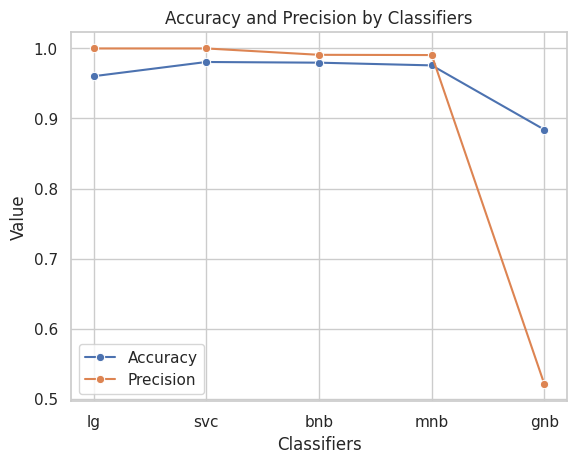

In [149]:
sns.set(style="whitegrid")
sns.lineplot(x=final_performance_df.classifiers, y=final_performance_df.accuracy, marker='o', label='Accuracy', data=final_performance_df)
sns.lineplot(x=final_performance_df.classifiers, y=final_performance_df.precision, marker='o', label='Precision', data=final_performance_df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()

**RESULT**

The above plot shows that svc has the best performance with ```accuracy = 98.06%``` and ```precision = 100%```



---


